In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Some helper functions

Draw the tracks

In [2]:
# Note there are 2 different phis used:
#   - phi_circle (the angle of the center of the circle in r-phi plane)
#   - phi_track (the direction of the particle that made the track) 
#
#  For positive tracks: phi_circle = phi_track - pi/2
#  For negative tracks: phi_circle = phi_track + pi/2
from TrackHelper import getPhiCircle
from TrackHelper import drawTrack


# Now Detector Classes

simple Detector geo is the phi symmetric detector geometry

In [3]:
from simpleDetectorGeo import simpleDetectorGeo

# Define the detector geometry (no modules yet)

In [4]:
rDet = np.array([0.5, 1.0, 1.5, 2, 2.5,3.0])


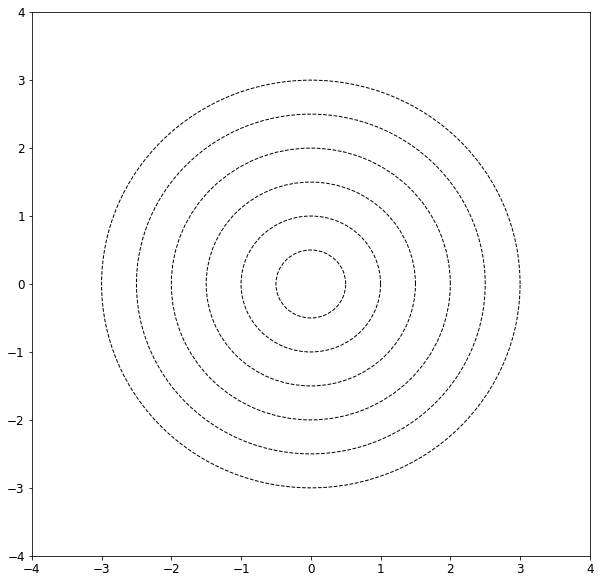

In [5]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 4
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))


detGeo = simpleDetectorGeo(rDet)
detGeo.drawDetector(ax)
    

# Sart with Tracks (circle coming from the origin)

Start with one positive (red) and one negative (blue) track, both with phi=0 and rC = 5

In [6]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)
    
    
for pt in [5]:
    for phi in [0]:
        drawTrack(pt,phi,+1)
        xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,+1)
        plt.plot(xs,ys,'ro')
        
        
        drawTrack(pt,phi,-1)        
        xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,-1)        
        plt.plot(xs,ys,'ro')

#plt.show()

Note there are 2 different phis used:
  * phi_circle (the angle of the center of the circle in r-phi plane)
  * phi_track (the direction of the particle that made the track) 

The above tracks have the same phi_track but the phi_cirlce differ by np.pi
  * For positive tracks: phi_circle = phi_track - pi/2
  * For negative tracks: phi_circle = phi_track + pi/2

### Try a bunch of tracks:

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)
    
    
for pt in [5, 50, 2]:
    for phi in [0,np.pi/2,np.pi,3*np.pi/2]:
        drawTrack(pt,phi,+1)
        xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,+1)
        plt.plot(xs,ys,'ro')
        
        drawTrack(pt,phi,-1)
        xs, ys, layerIDs, becs = detGeo.getHits(pt,phi,-1)
        plt.plot(xs,ys,'ro')

plt.show()

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm

OK basics work. Lets generate a dataset and play around

## Get Truth Tracks

In [8]:
np.random.seed(42)

# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []


nTrk = 50
hitID = 0

for trkI in range(nTrk):
    ptInv = np.random.uniform(0.01,0.5,1)[0]
    phi   = np.random.uniform(0.0,2*np.pi,1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt = 1./ptInv

    eventParticles.append((trkI,pt,phi,q,6))
    xHits, yHits, layerIDs, becs = detGeo.getHits(pt,phi,q)
    solutions.append([xHits,yHits,pt,phi,q])
    for hitItr in range(len(xHits)):
        # hit_id, particle_id, tx, ty, tz, weight (=1 for now)
        eventTruth.append((hitID,trkI,xHits[hitItr],yHits[hitItr],1.0))
        eventHits .append((hitID,xHits[hitItr],yHits[hitItr],hitItr))        
        hitID += 1



/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))


## Make reconstructed hits from truth Hits  (add smearing and noise later)

In [9]:

recHits = np.array(eventHits)

np.random.seed(42)
shuffle_index = np.random.permutation(len(recHits))
recHits = recHits[shuffle_index]
recHits[0:10]


array([[ 2.03000000e+02, -1.87210014e+00,  2.34419305e+00,
         5.00000000e+00],
       [ 2.66000000e+02,  9.33881445e-01,  1.17382513e+00,
         2.00000000e+00],
       [ 1.52000000e+02,  1.35499069e+00, -6.43428503e-01,
         2.00000000e+00],
       [ 9.00000000e+00, -1.95784871e+00, -4.08446342e-01,
         3.00000000e+00],
       [ 2.33000000e+02, -2.58780742e+00, -1.51764711e+00,
         5.00000000e+00],
       [ 2.26000000e+02,  1.32783155e+00,  2.11822175e+00,
         4.00000000e+00],
       [ 1.96000000e+02, -2.44871583e+00, -5.03776519e-01,
         4.00000000e+00],
       [ 1.09000000e+02, -2.17871921e-01,  9.75977370e-01,
         1.00000000e+00],
       [ 5.00000000e+00,  2.99965598e+00, -4.54315248e-02,
         5.00000000e+00],
       [ 1.75000000e+02,  3.23931688e-01,  9.46080473e-01,
         1.00000000e+00]])

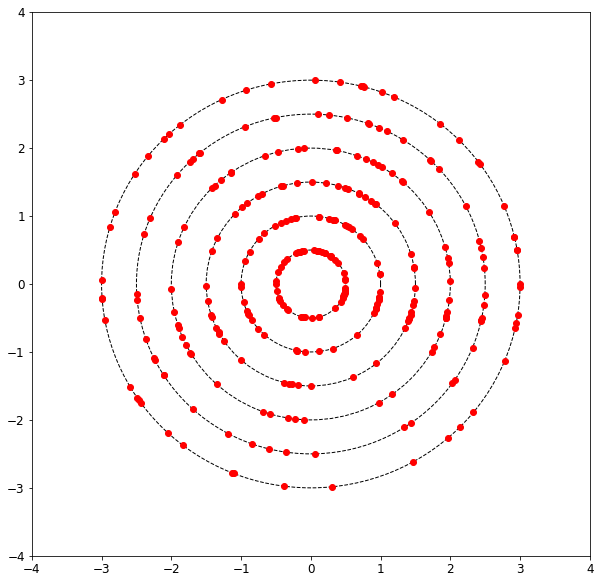

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)

plt.plot(recHits[:,1],recHits[:,2],'ro')
#color = "b" if (q < 0) else "r"
#plt.plot(xHits,yHits,color)

## Draw Solutions

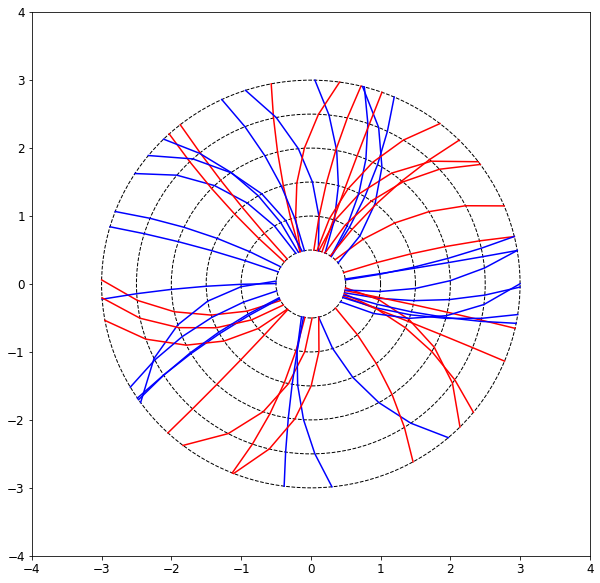

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)
#plt.plot(recHits[:,0],recHits[:,1],'ro')


for s in solutions:
    color = "b" if (s[4] < 0) else "r"
    plt.plot(s[0],s[1],color)


# Test "Offline"  algorithm (ie: Hough transform) works

First try one track

### Implement the Hough transform

In [12]:
# given global posision and phi range, return consistent 1/rC
def getHTCartesian(hX, hY, phi, q):
    R2 = hX**2 + hY**2
    phi_circle = getPhiCircle(phi,q)

    f = 2/R2*(hX*np.cos(phi_circle)+hY*np.sin(phi_circle))
    return f

In [13]:
# given global posision and phi range, return consistent 1/rC
def getHT(hitR, hitPhi, phi):
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi

    phi_circle = getPhiCircle(phi,+1)

    f = 2/hitR*(np.cos(hitPhi-phi_circle))
    return f

## Try on one track first

 Draw the track

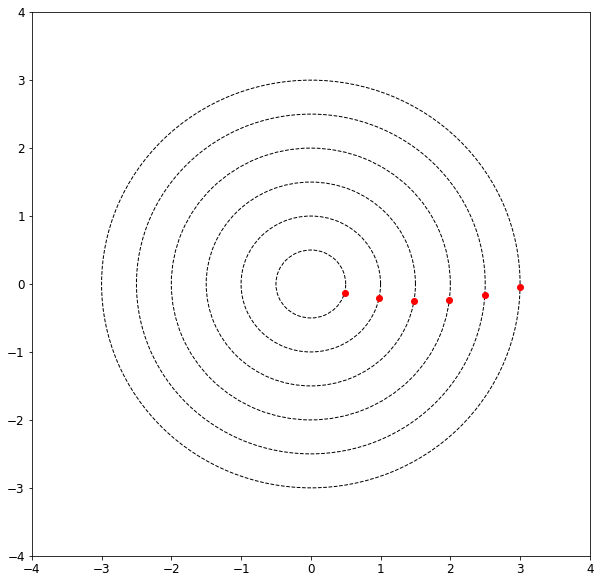

In [14]:
sTest = solutions[0]
testX = np.array(sTest[0])
testY = np.array(sTest[1])

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
detGeo.drawDetector(ax)
plt.plot(testX,testY,'ro')

Draw the transform

Truth Track, 1/Rc / phi / q 0.1935246582352076 5.9735141613602165 -1


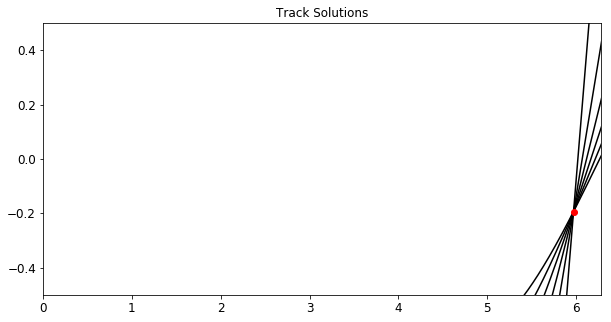

In [15]:
plt.figure(1, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([0, 2*np.pi, -0.5,0.5])  

soln = solutions[0]

truePhi = soln[3]
trueQ   = soln[4]
trueRc  = soln[2]
print("Truth Track, 1/Rc / phi / q",1./trueRc,truePhi,trueQ)


for hitItr in range(len(soln[0])):

    hitX = soln[0][hitItr]
    hitY = soln[1][hitItr]
    hitR = detGeo.layers[hitItr].layerR

    hitPhi = np.arctan2(hitY, hitX)   

    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    
    # Only consider plasiblel track (eg: from the orgin)
    phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    
    f = getHT(hitR, hitPhi,  phiXRange)

    plt.plot(phiXRange,f,"k")



plt.plot(truePhi,trueQ*1/trueRc,"ro")    

plt.show()

Math works!

## Try it on a few tracks

Truth Track, 1/Rc / phi / q 0.1935246582352076 5.9735141613602165 -1
Truth Track, 1/Rc / phi / q 0.392048590133657 3.7501201429971824 1
Truth Track, 1/Rc / phi / q 0.08643731496473929 0.3649500985631483 1
Truth Track, 1/Rc / phi / q 0.1735172194581207 0.8976586912506395 -1
Truth Track, 1/Rc / phi / q 0.020086402204943198 6.094123332392967 1


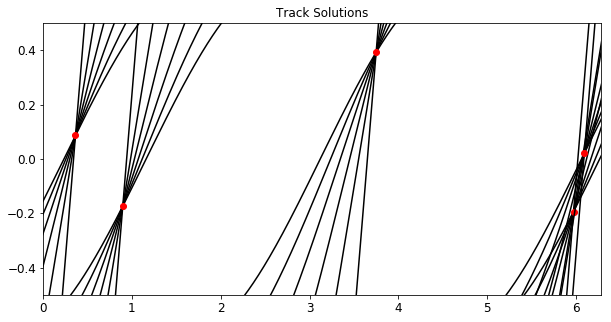

In [16]:
nTracks = 5 


plt.figure(1, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([0, 2*np.pi, -0.5,0.5])  

# Loop on Tracks
for solnItr in range(nTracks):
                
    soln = solutions[solnItr]
    truePhi = soln[3]
    trueQ   = soln[4]
    trueRc  = soln[2]
    print("Truth Track, 1/Rc / phi / q",1./trueRc,truePhi,trueQ)

    # Loop on hits
    for hitItr in range(len(soln[0])):

        hitX = soln[0][hitItr]
        hitY = soln[1][hitItr]
        hitR = detGeo.layers[hitItr].layerR

        hitPhi = np.arctan2(hitY, hitX)   
    
        # Convert 0-2Pi
        if hitPhi<0: hitPhi += 2*np.pi
    
        # Only consider plasiblel track (eg: from the orgin)
        phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)


        
        f = getHT(hitR, hitPhi,  phiXRange)
        plt.plot(phiXRange,f,"k")

    plt.plot(truePhi,trueQ*1/trueRc,"ro")   
        

plt.show()

(Need to fix lines so that they wrap in phi)

# Try to run pattern rec with 2D histogram

Truth Track, 1/Rc / phi / q 0.1935246582352076 5.9735141613602165 -1
Truth Track, 1/Rc / phi / q 0.392048590133657 3.7501201429971824 1
Truth Track, 1/Rc / phi / q 0.08643731496473929 0.3649500985631483 1
Truth Track, 1/Rc / phi / q 0.1735172194581207 0.8976586912506395 -1
Truth Track, 1/Rc / phi / q 0.020086402204943198 6.094123332392967 1


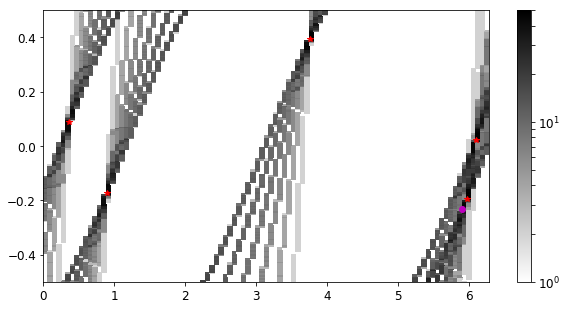

In [17]:
import matplotlib.colors as colors

nTracks = 5

fig, ax  = plt.subplots(1, figsize=(10,5))

# Data to be binned
allX = np.array([])
allY = np.array([])

drawLines = False
phiSamplingBins = 5000 #500

# Loop on Tracks
for solnItr in range(nTracks):
                
    soln = solutions[solnItr]
    truePhi = soln[3]
    trueQ   = soln[4]
    trueRc  = soln[2]
    print("Truth Track, 1/Rc / phi / q",1./trueRc,truePhi,trueQ)

    # Loop on hits
    for hitItr in range(len(soln[0])):

        hitX = soln[0][hitItr]
        hitY = soln[1][hitItr]
        hitR = detGeo.layers[hitItr].layerR
        hitPhi = np.arctan2(hitY, hitX)   
    
        # Convert 0-2Pi
        if hitPhi<0: hitPhi += 2*np.pi
    
        # Only consider plasiblel track (eg: from the orgin)
        phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, phiSamplingBins)

        f = getHT(hitR, hitPhi,  phiXRange)
        
        # Collect for histogram
        allX          = np.append(allX,phiXRange)
        allY          = np.append(allY,f)

        if drawLines:
            ax.plot(phiXRange,f,"k--")


    ax.plot(truePhi,trueQ*1/trueRc,"r*") 
        

nBinsX = 50*2
nBinsY = 50*2*2
yedges = np.linspace(-0.5,0.5,nBinsY)
xedges = np.linspace(0, 2*np.pi, nBinsX)

X, Y = np.meshgrid(xedges, yedges)
cmap = plt.get_cmap('binary')

# Tracks
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-0.5,0.5)

H, xedges, yedges = np.histogram2d(allX, allY, bins=(xedges, yedges))
H = H.T 
im = ax.pcolormesh(X, Y, H,norm=colors.LogNorm(),cmap=cmap)
fig.colorbar(im, ax=ax)

#  Plot the maxes
#
def getMax(hist2d):
    maxIdx1 = int(hist2d.argmax()%hist2d.shape[1])
    maxIdx2 = int(hist2d.argmax()/hist2d.shape[1]) 
    return maxIdx1, maxIdx2


hist_max = getMax(H)

ax.plot(xedges[hist_max[0]],yedges[hist_max[1]],"mo")



red stars are the truth tracks / purple dot is top reco track (using max)

# Class to do iterative track finding using the HT

probably should just focus on one phislice to start

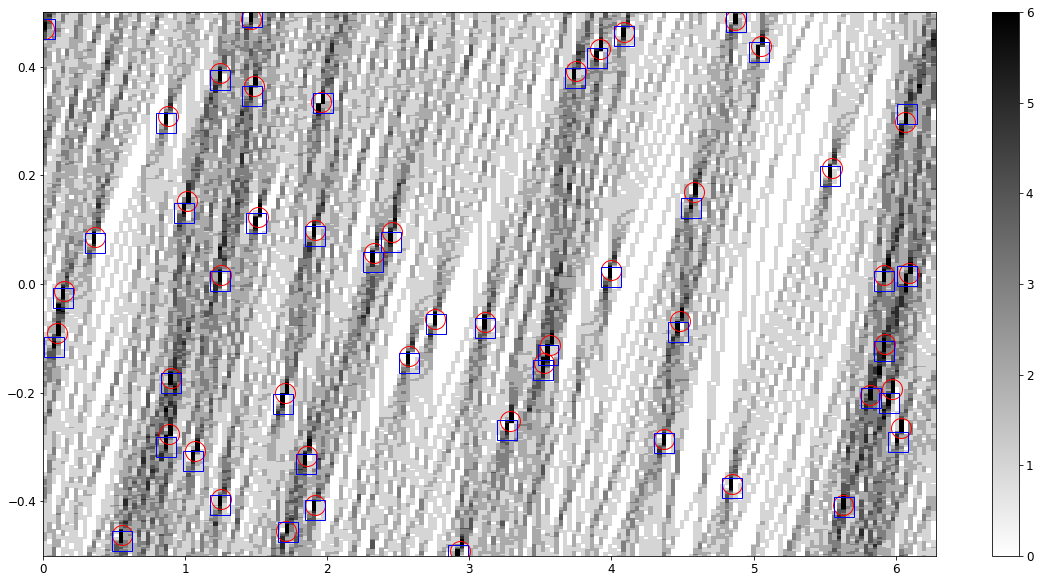

In [18]:
from HTTrackFinder import HTTrackFinding

def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

testMod = HTTrackFinding(0,2*np.pi,200,-0.5,0.5,400,getHTFunction=getHTForTrackFinding) 
fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
#  
for hitInfo in recHits:

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitLay = int(hitInfo[3])
    
        
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    testMod.addHit(hitLay, hitID, hitR, hitPhi)

#    
# Plot Truth
#
for part in eventParticles:
    truePhi = part[2]
    trueQ   = part[3]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))


    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(testMod.xBins, testMod.yBins)
cmap = plt.get_cmap('binary')

testMod.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-0.5,0.5)
H = np.array(testMod.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = testMod.findTracks(overlapLogicFirstHit=True)
for rT in recoTracks:
    recPhi,recCurv,recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()



Red circles are the true tracks, Blue squares are the reco tracks 

Lets plot all the unused hits:

In [19]:
fig, ax = plt.subplots(1, figsize=(20,10))

plt.figure(1)
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-0.5,0.5)
H = np.array(testMod.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)



pretty good for now.  Lets move on to doing fast pattern rec with FTK....Start another notebook "FTKToy"

## Will use the kaggle scoring functions to see how well we did.

In [20]:
solns = testMod.getSolutions()
solns.head()

event_id  hit_id  track_id
0         0    30.0         0
1         0    31.0         0
2         0    32.0         0
3         0    33.0         0
4         0   154.0         0

Truth information. Must have hit_id, particle_id, and weight columns.

In [21]:
#        eventTruth.append((hitID,trkI,xHits[hitItr],yHits[hitItr],1.0))
truthArr = np.array(eventTruth)
truthArr = np.delete(truthArr, 2, axis=1)
truthArr = np.delete(truthArr, 2, axis=1)


In [22]:
import pandas as pd
truthDict = {
    "hit_id" : pd.Series(truthArr[:,0]),
    "particle_id" : pd.Series(truthArr[:,1]),    
    "weight" : pd.Series(truthArr[:,2]),
}

truth = pd.DataFrame(truthDict)
truth.head()

hit_id  particle_id  weight
0     0.0          0.0     1.0
1     1.0          0.0     1.0
2     2.0          0.0     1.0
3     3.0          0.0     1.0
4     4.0          0.0     1.0

## Using the kaggle score function requires a few hacks: 
  - Checkout the trackml-library: https://github.com/LAL/trackml-library
  - link score.py in the current dir 


In [23]:
pd.__version__

'0.23.0'

In [24]:
from trackml.score import score_event

score_event(truth,solns)

0.8533333333333334

Not bad, updating to do a proper overlap removal will improve this

In [25]:
# Need to remove overlap !
solns["hit_id"].value_counts()

291.0    1
144.0    1
146.0    1
147.0    1
148.0    1
149.0    1
294.0    1
296.0    1
298.0    1
270.0    1
272.0    1
274.0    1
84.0     1
85.0     1
86.0     1
87.0     1
88.0     1
109.0    1
161.0    1
59.0     1
94.0     1
223.0    1
224.0    1
225.0    1
226.0    1
227.0    1
54.0     1
55.0     1
158.0    1
57.0     1
        ..
221.0    1
204.0    1
205.0    1
206.0    1
207.0    1
208.0    1
180.0    1
181.0    1
182.0    1
183.0    1
184.0    1
216.0    1
251.0    1
250.0    1
187.0    1
241.0    1
242.0    1
243.0    1
244.0    1
245.0    1
186.0    1
188.0    1
249.0    1
189.0    1
190.0    1
191.0    1
246.0    1
247.0    1
248.0    1
30.0     1
Name: hit_id, Length: 299, dtype: int64

# Add Logic for overlap removal

First idea is to first find roads including all hits then remove outliers, then remove overlap.

In [26]:
testModFitting = HTTrackFinding(0,2*np.pi,200,-0.5,0.5,400,getHTFunction=getHTForTrackFinding) 

#
# Loop on rec hits
#  
for hitInfo in recHits:

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitLay = int(hitInfo[3])
    
        
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    testModFitting.addHit(hitLay, hitID, hitR, hitPhi)

testModFitting.combineLayerMaps()
recRoads = testModFitting.findTracks(overlapLogicFirstHit=False)


Add Rs and phis to the input hits (needed for the fitter)

In [27]:
Rs = np.sqrt(recHits[:,1]**2 + recHits[:,2]**2)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

recHitsNew = np.c_[recHits,Rs,Phis]


In [28]:
from HTTrackFinder import DORead
testRoadFullInfo = DORead(recRoads[0],recHitsNew)
print(testRoadFullInfo[0])
print(testRoadFullInfo)

[0.01578689775673263, 0.46867167919799496, 1.0]
[[0.01578689775673263, 0.46867167919799496, 1.0], array([[ 3.00000000e+01,  4.96819515e-01, -5.63060347e-02,
         0.00000000e+00,  5.00000000e-01,  6.17033385e+00],
       [ 3.10000000e+01,  9.73146544e-01, -2.30186456e-01,
         1.00000000e+00,  1.00000000e+00,  6.05091603e+00],
       [ 1.00000000e+00,  9.77452436e-01, -2.11155711e-01,
         1.00000000e+00,  1.00000000e+00,  6.07042813e+00],
       [ 3.20000000e+01,  1.40633380e+00, -5.21752080e-01,
         2.00000000e+00,  1.50000000e+00,  5.92792469e+00],
       [ 2.90000000e+02,  1.41224966e+00, -5.05520414e-01,
         2.00000000e+00,  1.50000000e+00,  5.93944217e+00],
       [ 3.30000000e+01,  1.77002640e+00, -9.31131867e-01,
         3.00000000e+00,  2.00000000e+00,  5.79891134e+00],
       [ 1.54000000e+02,  2.06426140e+00, -1.41025703e+00,
         4.00000000e+00,  2.50000000e+00,  5.68383903e+00],
       [ 3.40000000e+01,  2.03046892e+00, -1.45849099e+00,
         4

Fit Tracks

In [29]:
fittedTracks = testModFitting.fitTracks(recRoads,recHitsNew,0.01)
print(len(recRoads))
print(len(fittedTracks))



50
49


## Remove Overlap

In [30]:
solnsFitted = testModFitting.getSolutionsFromTracks(fittedTracks)
nTracksPerHit = solnsFitted["hit_id"].value_counts()
multiTperH = nTracksPerHit[nTracksPerHit > 1]
testModFitting.removeOverlap(fittedTracks,multiTperH.index)

In [31]:
solnsCleaned = testModFitting.getSolutionsFromTracks(fittedTracks)
solnsCleaned.head()

event_id  hit_id  track_id
0         0    30.0         0
1         0    31.0         0
2         0    32.0         0
3         0    33.0         0
4         0    34.0         0

In [32]:
score_event(truth,solnsCleaned)

0.8933333333333333

# Compare the Kinematics

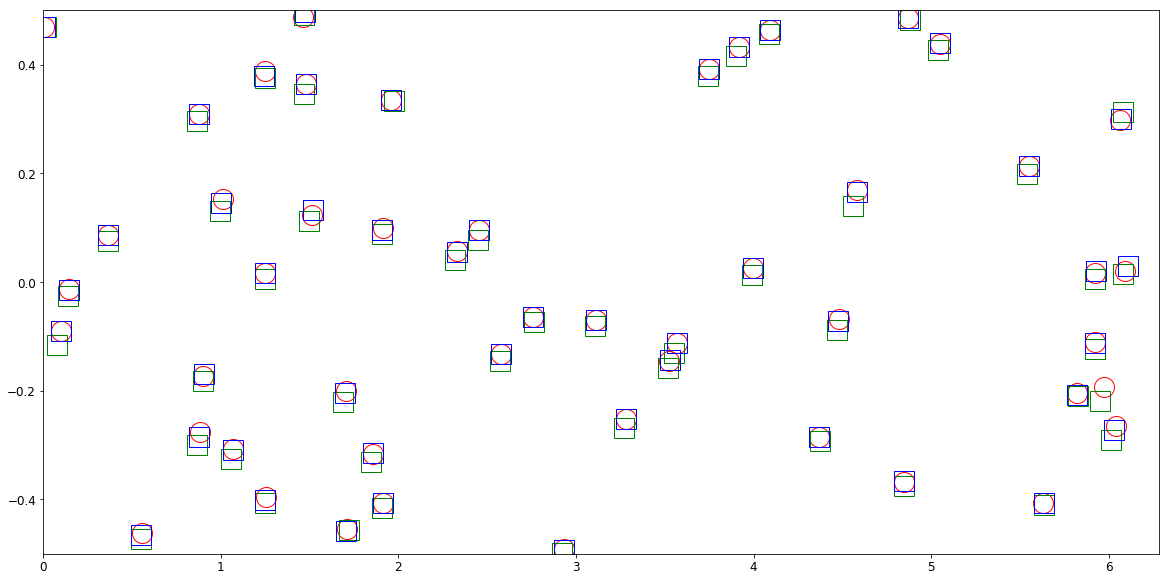

In [34]:
fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    truePhi = part[2]
    trueQ   = part[3]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-0.5,0.5)

for trkIndex, rT in enumerate(recoTracks):
    recPhi,recCurv,recQ  = rT[0]
    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

for fitIndex, fT in enumerate(fittedTracks):
    fitPhi, fitCurv, fitQ = fT[0]

    #diffPhi = abs(recPhi - fitPhi)/recPhi
    #diffCurv = abs(recCurv - fitCurv)
    #print(diffPhi,diffCurv)
    ax.plot(fitPhi,fitCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

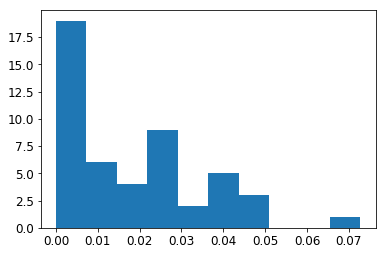

In [35]:

X2Before = []
X2After = []
for f in fittedTracks:
    X2Before.append(f[2])
    X2After.append(f[3])
    
#print(X2Before)
plt.hist(X2Before)
plt.show()
plt.hist(X2After)
plt.show()

In [36]:
def printCounts(trackPerHit):
    print(len(trackPerHit[trackPerHit > 0]))
    print(len(trackPerHit[trackPerHit > 1]))
    print(len(trackPerHit[trackPerHit > 2]))
    print(len(trackPerHit[trackPerHit > 3]))


printCounts(solns["hit_id"].value_counts())
printCounts(solnsFitted["hit_id"].value_counts())
printCounts(solnsCleaned["hit_id"].value_counts())

#solnsFitted2 = testMod.getSolutionsFromTracks(fittedTracks2)
#printCounts(solnsFitted2["hit_id"].value_counts())
    


299
0
0
0
292
41
2
0
292
0
0
0


In [37]:
print(score_event(truth,solns))
#print(score_event(truth,solnsFitted))
print(score_event(truth,solnsCleaned))


0.8533333333333334
0.8933333333333333


In [38]:
solns.info()
truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
event_id    299 non-null int64
hit_id      299 non-null float64
track_id    299 non-null int64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
hit_id         300 non-null float64
particle_id    300 non-null float64
weight         300 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


In [39]:
print(recHits[0])
print(recHitsNew[0])

[203.          -1.87210014   2.34419305   5.        ]
[203.          -1.87210014   2.34419305   5.           3.
   2.24469021]


In [40]:
def drawTrackToFit(fullTrackInfo,color="k"):
    plt.plot(fullTrackInfo[1][:,4],fullTrackInfo[1][:,5],color+"o")


In [41]:
testRoad = testModFitting.tracks[-2]

In [42]:
from HTTrackFinder import DORead
testRoadFullInfo = DORead(testRoad,recHitsNew)
print(testRoadFullInfo)

[[6.046381840828596, 0.27568922305764404, 1.0], array([[ 79.        ,   0.9318176 ,  -0.36292694,   1.        ,
          1.        ,   5.91177822],
       [127.        ,   0.93630925,  -0.35117657,   1.        ,
          1.        ,   5.92435789],
       [151.        ,   0.93318696,  -0.35939128,   1.        ,
          1.        ,   5.91556979],
       [152.        ,   1.35499069,  -0.6434285 ,   2.        ,
          1.5       ,   5.83985263],
       [153.        ,   1.73525184,  -0.99443504,   3.        ,
          2.        ,   5.76279649],
       [154.        ,   2.0642614 ,  -1.41025703,   4.        ,
          2.5       ,   5.68383903],
       [155.        ,   2.33103564,  -1.8884578 ,   5.        ,
          3.        ,   5.60229387]])]


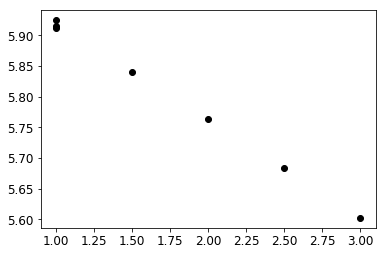

In [43]:
drawTrackToFit(testRoadFullInfo)